In [ ]:
# TODO: Make all necessary imports.
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import time
import numpy as np
import matplotlib.pyplot as plt
import json

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras import layers 
from tensorflow.keras import Model 


In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 4s 0us/step


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
directory = data_dir
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=42)
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=42)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
num_classes = len(class_names)
num_classes

5

In [ ]:
batch_size = 32
image_size = 224

def format_image(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    return image, label

training_batches = train_dataset
validation_batches = validation_dataset

In [ ]:
# TODO: Load the dataset with TensorFlow Datasets.
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor = hub.KerasLayer(URL, input_shape=(image_size, image_size,3))

In [ ]:
feature_extractor.trainable = False

In [ ]:
layer_neurons = [650, 330, 250]

dropout_rate = 0.2

model = tf.keras.Sequential()

model.add(feature_extractor)

model.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


with tf.device('/GPU:0'):
    EPOCHS = 10

    history = model.fit(training_batches,
                        epochs=EPOCHS,
                        validation_data=validation_batches)

Epoch 1/10
92/92 [==============================] - 94s 979ms/step - loss: 1.4507 - accuracy: 0.3886 - val_loss: 1.2502 - val_accuracy: 0.5218
Epoch 2/10
92/92 [==============================] - 90s 980ms/step - loss: 1.1885 - accuracy: 0.5446 - val_loss: 1.1510 - val_accuracy: 0.5627
Epoch 3/10
92/92 [==============================] - 92s 998ms/step - loss: 1.0724 - accuracy: 0.6008 - val_loss: 1.1146 - val_accuracy: 0.5763
Epoch 4/10
92/92 [==============================] - 93s 1s/step - loss: 1.0196 - accuracy: 0.6192 - val_loss: 1.0695 - val_accuracy: 0.5954
Epoch 5/10
92/92 [==============================] - 91s 992ms/step - loss: 0.9639 - accuracy: 0.6488 - val_loss: 1.0822 - val_accuracy: 0.6049
Epoch 6/10
92/92 [==============================] - 92s 994ms/step - loss: 0.9210 - accuracy: 0.6591 - val_loss: 1.0558 - val_accuracy: 0.6022
Epoch 7/10
92/92 [==============================] - 91s 991ms/step - loss: 0.8971 - accuracy: 0.6713 - val_loss: 1.0488 - val_accuracy: 0.6185
Ep

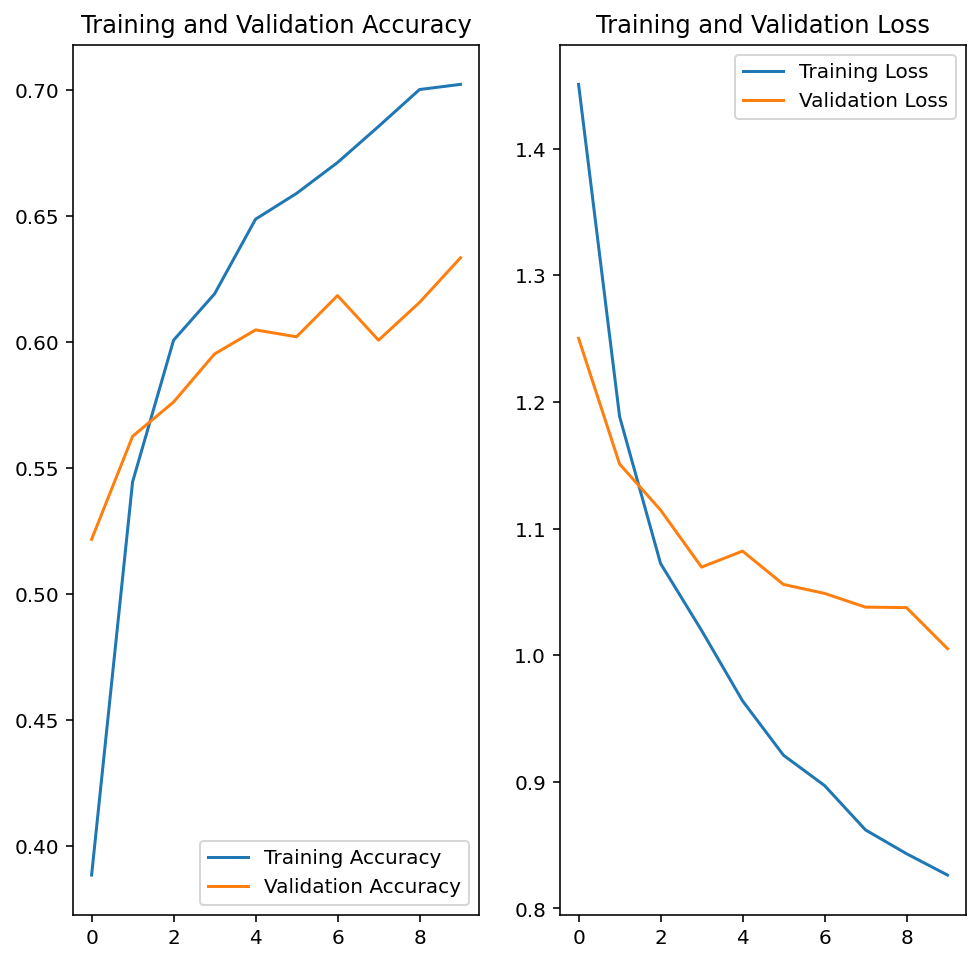

In [ ]:
#plotting the graph 
#for training and validation comparision
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
layer_neurons = [650, 330, 250]

dropout_rate = 0.2

model = tf.keras.Sequential()

model.add(feature_extractor)

model.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


with tf.device('/GPU:0'):
    EPOCHS = 10

    vgghist = model.fit(training_batches,
                        epochs=EPOCHS,
                        validation_data=validation_batches)

Epoch 1/10
92/92 [==============================] - 94s 1000ms/step - loss: 1.4639 - accuracy: 0.3832 - val_loss: 1.2448 - val_accuracy: 0.5123
Epoch 2/10
92/92 [==============================] - 91s 989ms/step - loss: 1.1792 - accuracy: 0.5507 - val_loss: 1.1456 - val_accuracy: 0.5450
Epoch 3/10
92/92 [==============================] - 90s 970ms/step - loss: 1.0861 - accuracy: 0.5964 - val_loss: 1.1230 - val_accuracy: 0.5586
Epoch 4/10
92/92 [==============================] - 91s 985ms/step - loss: 1.0189 - accuracy: 0.6196 - val_loss: 1.0829 - val_accuracy: 0.5886
Epoch 5/10
92/92 [==============================] - 91s 992ms/step - loss: 0.9716 - accuracy: 0.6454 - val_loss: 1.0531 - val_accuracy: 0.6131
Epoch 6/10
92/92 [==============================] - 92s 997ms/step - loss: 0.9295 - accuracy: 0.6635 - val_loss: 1.0420 - val_accuracy: 0.6131
Epoch 7/10
92/92 [==============================] - 89s 966ms/step - loss: 0.8971 - accuracy: 0.6747 - val_loss: 1.0324 - val_accuracy: 0.618

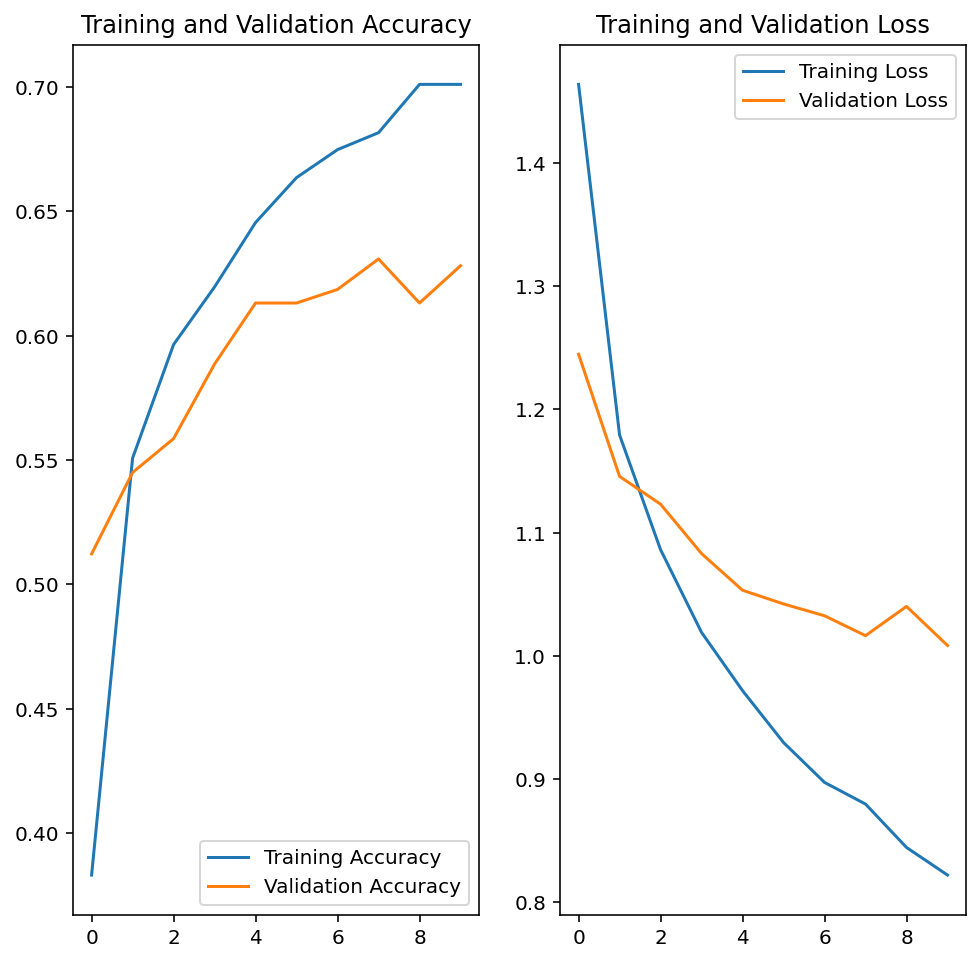

In [ ]:
training_accuracy = vgghist.history['accuracy']
validation_accuracy = vgghist.history['val_accuracy']

training_loss = vgghist.history['loss']
validation_loss = vgghist.history['val_loss']

epochs_range=range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, GlobalAveragePooling2D, Input, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = Sequential([
  #layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='softmax'),
  #layers.Conv2D(16, 3, padding='same', activation='softmax'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='softmax'),
  #layers.Conv2D(32, 3, padding='same', activation='softmax'),
  layers.MaxPooling2D(),
  layers.Conv2D(48, 3, padding='same', activation='softmax'),
  #layers.Conv2D(64, 3, padding='same', activation='softmax'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='softmax'),
  #layers.Conv2D(128, 3, padding='same', activation='softmax'),
  layers.MaxPooling2D(),
  layers.Conv2D(80, 3, padding='same', activation='softmax'),
  #layers.Conv2D(256, 3, padding='same', activation='softmax'),
  layers.MaxPooling2D(),
  layers.Conv2D(96, 3, padding='same', activation='softmax'),
  #layers.Conv2D(512, 3, padding='same', activation='softmax'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='softmax'),
  layers.Conv2D(128, 3, padding='same', activation='softmax'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='softmax'),
  layers.Dense(5, activation='softmax')
])

In [ ]:
from tensorflow.keras.optimizers import Adam

#model.summary()

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
with tf.device('/GPU:0'):
    EPOCHS = 10

history = model.fit(training_batches, epochs=EPOCHS, validation_data=validation_batches)

Epoch 1/10
92/92 [==============================] - 166s 2s/step - loss: 1.6075 - accuracy: 0.2350 - val_loss: 1.6004 - val_accuracy: 0.2602
Epoch 2/10
92/92 [==============================] - 164s 2s/step - loss: 1.6045 - accuracy: 0.2408 - val_loss: 1.5960 - val_accuracy: 0.2602
Epoch 3/10
92/92 [==============================] - 163s 2s/step - loss: 1.6035 - accuracy: 0.2408 - val_loss: 1.5937 - val_accuracy: 0.2602
Epoch 4/10
92/92 [==============================] - 163s 2s/step - loss: 1.6031 - accuracy: 0.2408 - val_loss: 1.5927 - val_accuracy: 0.2602
Epoch 5/10
92/92 [==============================] - 163s 2s/step - loss: 1.6031 - accuracy: 0.2408 - val_loss: 1.5919 - val_accuracy: 0.2602
Epoch 6/10
92/92 [==============================] - 163s 2s/step - loss: 1.6029 - accuracy: 0.2408 - val_loss: 1.5918 - val_accuracy: 0.2602
Epoch 7/10
92/92 [==============================] - 166s 2s/step - loss: 1.6030 - accuracy: 0.2408 - val_loss: 1.5914 - val_accuracy: 0.2602
Epoch 8/10
92

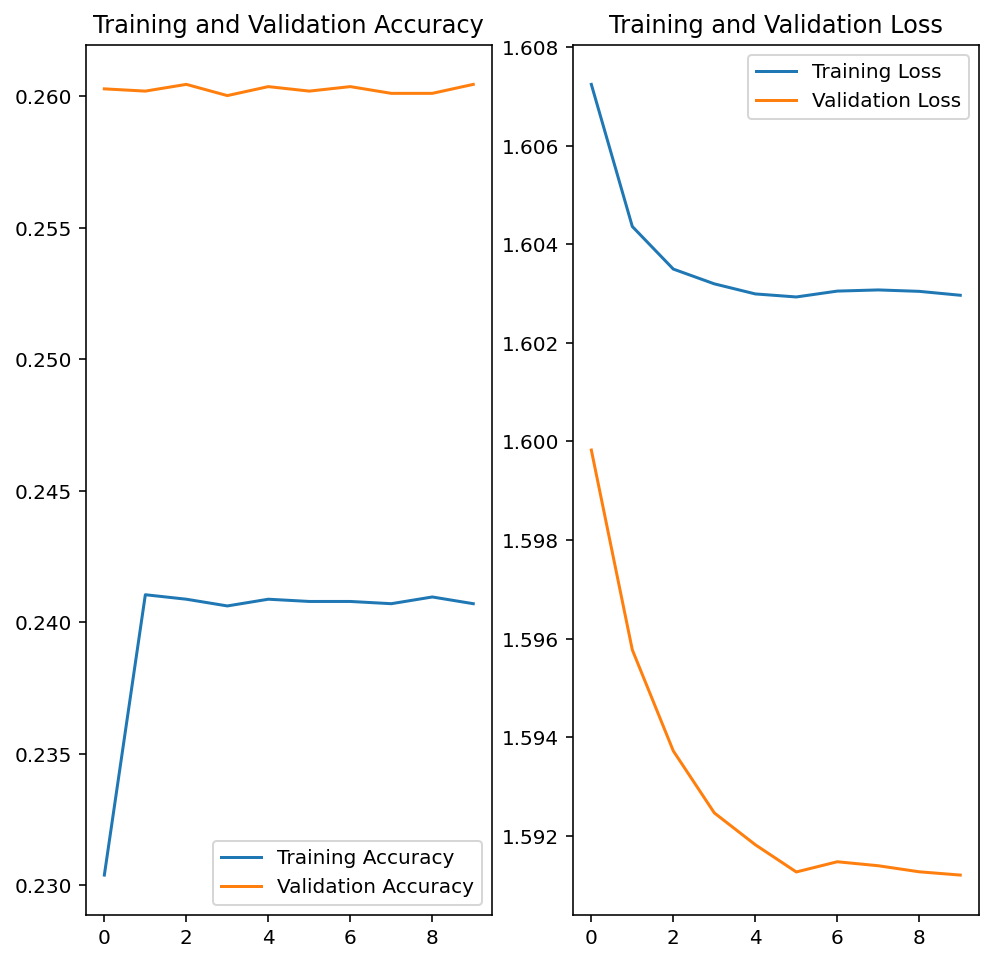

In [ ]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()